In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.17.0'

In [3]:
data = pd.read_csv('datasets/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,52.115002,52.660000,52.110001,52.419998,50.590397,86693600
1,2019-07-30,52.189999,52.540001,51.827499,52.195000,50.373257,135742800
2,2019-07-31,54.105000,55.342499,52.825001,53.259998,51.401081,277125600
3,2019-08-01,53.474998,54.507500,51.685001,52.107498,50.288803,216071600
4,2019-08-02,51.382500,51.607498,50.407501,51.005001,49.224789,163448400


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
data['Close'] = sc.fit_transform(data[['Close']])

In [6]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10

Close = data['Close'].values
x, y = create_sequences(Close, SEQ_LENGTH)

x = x.reshape((x.shape[0], x.shape[1], 1))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
# Define the model
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.LSTM(units = 100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 100, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 100))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

C:\Users\ej8866a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0633 - val_loss: 0.0136
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0048 - val_loss: 4.6020e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0021 - val_loss: 5.9684e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017 - val_loss: 5.9067e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - val_loss: 4.1188e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - val_loss: 5.8800e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9779e-04
Test loss: 0.0003881483862642199
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


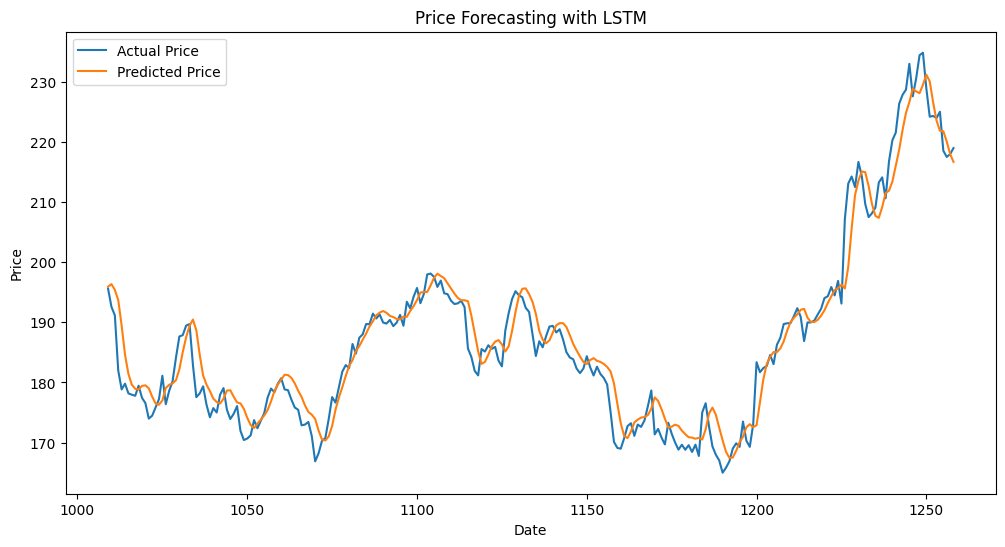

In [13]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(x_test)

# Inverse transform the predictions and true values
y_test_inv = sc.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = sc.inverse_transform(y_pred)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_inv, label='Actual Price')
plt.plot(data.index[-len(y_pred):], y_pred_inv, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Forecasting with LSTM')
plt.legend()
plt.show()